<a href="https://colab.research.google.com/github/benkeel/hestia_python_practicals/blob/main/Bumblekite2024_tutorial_1_participants_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bumblekite Tutorial 1: Hidden Hypoxemia's Impact on In-Hospital Mortality


* Understanding the Problem: Pulse oximeters are medical devices used to measure the level of oxygen in the blood without needing a blood sample. The most accurate method, however, requires taking a blood sample to measure oxygen levels directly. Pulse oximeters currently available are less accurate in people with darker skin tones. Theses pulse oximetry inaccuracies can fail to detect episodes of hidden hypoxemia, i.e., low SaO2 with high SpO2. Hidden hypoxemias can result in less treatment and increased mortality. Yet flawed, pulse oximeters remain ubiquitously used because of their ease of use; debiasing the underlying algorithms could alleviate the downstream repercussions of hidden hypoxemia.

* Dataset: BOLD is a new comprehensive dataset that aims to underscore the importance of addressing biases in pulse oximetry accuracy, which disproportionately affect darker-skinned patients. The dataset was created by harmonizing three Electronic Health Record databases (MIMIC-III, MIMIC-IV, eICU-CRD) comprising Intensive Care Unit stays of US patients.

* Main Paper: The tutorial is build upon the paper titled "Analysis of Discrepancies Between Pulse Oximetry and Arterial Oxygen Saturation Measurements by Race and Ethnicity and Association With Organ Dysfunction and Mortality" published in JAMA Network Open. This paper investigates discrepancies between pulse oximetry (SpO2) and arterial oxygen saturation (SaO2) measurements, examining the impact of these discrepancies on clinical outcomes across different racial and ethnic groups.


* Objective of the tutorial: The objective of this tutorial is to provide a comprehensive guide on how to analyze and address biases in healthcare data, with a specific focus on hidden hypoxemia and its impact on in-hospital mortality predictions. Through a series of structured steps, including exploratory data analysis, data preprocessing, train-test splitting, and model evaluation, participants will learn how to:

1. Detect and understand hidden patterns and biases in healthcare datasets.
2. Preprocess data effectively to ensure robust and reliable model performance.
3. Evaluate the influence of hidden hypoxemia on patient outcomes using statistical and machine learning techniques.
4. Assess and compare the performance of different models across various racial groups to highlight the importance of careful feature selection and bias mitigation in clinical predictions.


* Key Variables to keep in mind:

1. **Pulse Oximetry (SpO2)**: This is a [ non-invasive ] method used to measure the oxygen level (oxygen saturation) in the blood. It is usually done using a device clipped onto a finger, toe, or earlobe. Normal SpO2 levels range from 95% to 100%, indicating sufficient oxygen in the blood. Levels below 95% can indicate hypoxemia, with severe hypoxemia occurring below 85%.
2. **Arterial Oxygen Saturation (SaO2)**: This is an [ invasive ] measurement of oxygen saturation directly from the blood using an arterial blood gas (ABG) test. It is more accurate than pulse oximetry but requires drawing blood from an artery. SaO2 provides a direct measurement of oxygen levels in the blood and is used to confirm the accuracy of SpO2 readings, especially in cases of suspected hypoxemia.
3. **ABG**: Arterial Blood Gas
4. **Hypoxemia**: This refers to low levels of oxygen in the blood. It can be dangerous and requires medical attention.
5. **Hidden Hypoxemia**: This occurs when a patient's pulse oximetry reading (SpO2) suggests they have normal oxygen levels, but their arterial oxygen saturation (SaO2) shows they actually have low oxygen levels. → (ie, SpO2 ≥ 88% but SaO2 <88%).
6. **Organ Dysfunction**: This refers to the impaired function of organs (like the heart, lungs, liver, or kidneys) often assessed using specific scores like the Sequential Organ Failure Assessment (SOFA) score.
7. **In-hospital Mortality**: This means death occurring during a hospital stay.
8. **Sequential Organ Failure Assessment (SOFA) Score**: A scoring system used to track a patient's status during their stay in an intensive care unit (ICU). Higher scores indicate more severe organ dysfunction.
9. **Electronic Health Record (EHR)**: Digital version of patients' paper charts. They contain the medical and treatment history of patients.


Note: A lot of the content in this tutorial was inspired from theses previous datathons: MIT Critical Datathon 2023 and Brown University Datathon 2024.  


**👥 Pairing Team**

`Add your names here (alphabetically)`

- ....
- ....


# Loading the dependencies and libraries

In [ ]:
# If you are using Jupyter Notebook, make sure you are in the right environment kernel!

In [22]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [ ]:
# Mount Google Drive to access your files:
from google.colab import drive
drive.mount('/content/drive')

In [24]:
# After ensuring that your CSV file is placed in your Google Drive, run:

import pandas as pd

df_initial = pd.read_csv("/content/bold_dataset.csv")

In [25]:
# Did it work? Inspect the Data:

# Peak at our data (First 5 rows)
df_initial.head()

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0


In [26]:
# Get a summary of the DataFrame
print(df_initial.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49093 entries, 0 to 49092
Columns: 142 entries, unique_subject_id to sofa_future_renal_24hr
dtypes: bool(1), float64(122), int64(7), object(12)
memory usage: 52.9+ MB
None


In [27]:
# Get the column names
column_names = df_initial.columns.tolist()
print ("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

For an overview of all the variables and their meanings, please refer to the paper on the dataset [BOLD: Blood-gas and Oximetry Linked Dataset](https://www.nature.com/articles/s41597-024-03225-z#Sec23) . Check the "Description of fields" section for detailed information.


In [28]:
# List of key variables to explore further
key_variables = [

    'source_db', 'comorbidity_score_value',

    # ids
    'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id',

    # patient
    'admission_age', 'sex_female', 'race_ethnicity', 'BMI_admission', # BMI: Body Mass Index
    'weight_admission' , 'height_admission',

    # ICU stay info
    'sofa_past_overall_24hr', 'sofa_future_overall_24hr',

    # Vital signs
    'vitals_heart_rate',  'vitals_mbp_ni', 'vitals_resp_rate', 'vitals_tempc',
        ## MBP: Mean Blood Measure
        ## invasive(i) and non invasive(ni)
        ## DBP: Diastolic Blood Pressure

    # LABS
    'cbc_wbc', 'cbc_hematocrit', 'cbc_platelet',
    'coag_fibrinogen', 'coag_inr',
    'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine',
    'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast',
    'hfp_bilirubin_total', 'hfp_albumin', 'others_ck_cpk',
    'others_ld_ldh',

    # Target
    'in_hospital_mortality',

     # ABG data
    'pH',

    # Study Features
    'SpO2', 'SaO2',

]

In [29]:
# Filter the dataset to only focus on the key variables relevant to the tutorial
df_key_variables = df_initial [key_variables]

In [30]:
# Visualize the columns of the new dataframe
print(df_key_variables.columns.tolist())

['source_db', 'comorbidity_score_value', 'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'admission_age', 'sex_female', 'race_ethnicity', 'BMI_admission', 'weight_admission', 'height_admission', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr', 'vitals_heart_rate', 'vitals_mbp_ni', 'vitals_resp_rate', 'vitals_tempc', 'cbc_wbc', 'cbc_hematocrit', 'cbc_platelet', 'coag_fibrinogen', 'coag_inr', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total', 'hfp_albumin', 'others_ck_cpk', 'others_ld_ldh', 'in_hospital_mortality', 'pH', 'SpO2', 'SaO2']


In [31]:
df_key_variables.shape

(49093, 43)

In [32]:
# Calculate the percentage of each unique value in the 'race_ethnicity' column
race_ethnicity_counts = df_key_variables['race_ethnicity'].value_counts(normalize=True) * 100

# Display the percentages
print(race_ethnicity_counts)

race_ethnicity
White                                 76.141201
Black                                  9.746807
Unknown                                7.255617
Hispanic OR Latino                     4.310187
Asian                                  1.747703
American Indian / Alaska Native        0.774041
Native Hawaiian / Pacific Islander     0.018333
More Than One Race                     0.006111
Name: proportion, dtype: float64


In [33]:
# Filter the Dataframe to include only the most common racial/ethnic groups
# Please add your code here ...
# ["White", "Black", "Hispanic OR Latino", "Asian"]
df_filtered = df_key_variables[df_key_variables["race_ethnicity"].isin(["White", "Black", "Hispanic OR Latino", "Asian"])]
df_filtered["race_ethnicity"].value_counts()

race_ethnicity
White                 37380
Black                  4785
Hispanic OR Latino     2116
Asian                   858
Name: count, dtype: int64

In [34]:
df_filtered.shape

(45139, 43)

# Train Test Split



In [35]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split (df_filtered, test_size = 0.2, random_state = 42)

In [36]:
print("Shape of the training data", data_train.shape)
print("Shape of the testing data", data_test.shape)

Shape of the training data (36111, 43)
Shape of the testing data (9028, 43)


### Check balancing of the mortality outcome

* Question to the participants:
  - What is the purpose of this step?
  - How should we go about it?


* Your Answer: ...

In [38]:
# Please add your code here ...

print(df_filtered["in_hospital_mortality"].mean())
print(data_train["in_hospital_mortality"].mean())
print(data_test["in_hospital_mortality"].mean())



0.17536571747627025
0.17472150096322975
0.17794150480017862


- Question: Any observations?
- Your answer: ....

# Initial Exploratory Data Analysis (EDA)

## Pandas profiling

Pandas-profiling delivers an extended analysis of a DataFrame. Really helpful!

In [39]:
# Inspect the data types of each column
print(data_train.dtypes)

source_db                        object
comorbidity_score_value         float64
unique_subject_id                 int64
unique_hospital_admission_id      int64
unique_icustay_id                 int64
admission_age                   float64
sex_female                        int64
race_ethnicity                   object
BMI_admission                   float64
weight_admission                float64
height_admission                float64
sofa_past_overall_24hr          float64
sofa_future_overall_24hr        float64
vitals_heart_rate               float64
vitals_mbp_ni                   float64
vitals_resp_rate                float64
vitals_tempc                    float64
cbc_wbc                         float64
cbc_hematocrit                  float64
cbc_platelet                    float64
coag_fibrinogen                 float64
coag_inr                        float64
bmp_sodium                      float64
bmp_potassium                   float64
bmp_chloride                    float64


In [ ]:
! pip install pandas-profiling

In [ ]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data_train, title="Pandas Profiling Report of the Training Data")

# To display the report in a Jupyter notebook
profile.to_notebook_iframe()

# To save the report to an HTML file
# profile.to_file("path_of_where_ProfileReport_HTML_file_should_be_saved")
profile.to_file("/content/profile/data_train_copy_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Note: You can download the HTML file from your Drive to your local computer and view it there!

#### The Profile Report will take around 10 mins to run, so while it is loading....


* Think of the question: Why do you think we are doing the train test split right after loading the data specifically? Why not before or after?
* Your answer: ....





Now that we did our train test split, pre processing & EDA should be done solely on train set!

## Overview of the data using Tableone
Goal: To understand the distribution of patients across different racial-ethnic groups, sex, and other demographics. This step sets the foundation by showing the diversity in the dataset and highlighting potential areas of interest for further analysis.

In [48]:
profile

In [47]:
profile.to_file("/content/data_train_copy_report.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
# Create a new column with 'F' for female and 'M' for male
data_train['sex'] = data_train['sex_female'].apply(lambda x: 'F' if x == 1 else 'M')

In [53]:
df_filtered[df_filtered["admission_age"] < 0]

,source_db,comorbidity_score_value,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,admission_age,sex_female,race_ethnicity,BMI_admission,weight_admission,...,hfp_alp,hfp_ast,hfp_bilirubin_total,hfp_albumin,others_ck_cpk,others_ld_ldh,in_hospital_mortality,pH,SpO2,SaO2


In [54]:
# Create Age Groups:
bins = [0,65,float('inf')] # Specifies the edges of the bins for the age groups (0 to 65, and 65 and above).
labels = ['<65', '>=65'] # Specifies the labels for the age groups.
data_train ['age_group'] = pd.cut(data_train['admission_age'], bins = bins, labels = labels) # Creates a new column age_group in the DataFrame that categorizes admission_age into the specified age ranges.

In [55]:
data_train ['age_group']

12807     <65
2209      <65
13681    >=65
24674    >=65
20590     <65
         ... 
12244     <65
48586    >=65
41069     <65
881      >=65
16930     <65
Name: age_group, Length: 36111, dtype: category
Categories (2, object): ['<65' < '>=65']

In [56]:
! pip install tableone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.6 MB/s eta 0:00:00


In [73]:
from tableone import TableOne

# Specify the columns to include in the table
columns = ['admission_age',  'age_group' , 'BMI_admission', 'race_ethnicity', 'sex', 'in_hospital_mortality', 'coag_fibrinogen', "others_ck_cpk", "others_ld_ldh", "bmp_lactate"]


# Categorical Variables [represent categories]
categorical = ['sex', 'race_ethnicity', 'age_group']


# Define how to group the data for comparison
# In this case grouping by 'in_hospital_mortality' to compare different groups based on their mortality status
# Optional: Try to group by another outcome and see what you can get !! e.g 'race_ethnicity'
groupby = 'in_hospital_mortality'

# Indicates which variables are not normally distributed
nonnormal = ['BMI_admission']

# Renames the variables for better readability
labels = {
    'in_hospital_mortality': 'Mortality',
    'admission_age': 'Age',
    'race_ethnicity': 'Race and Ethnicity',
    'BMI_admission': 'BMI',
    'sex': 'Sex',
    'age_group': 'Age Group'
}

# Sets the order for categorical variables
order = {
    'sex': ['F', 'M'],  # 1 for Female, 0 for Male
    'age_group': ['<65','>=65']  # Example age groups
}


In [74]:
name_of_table = TableOne(
    data_train,  # The dataset to summarize
    columns=columns,
    categorical=categorical,
    groupby=groupby,
    nonnormal=nonnormal,
    rename=labels,
    order=order,
    # limit=limit,
    overall=True,  # Whether to include overall summary statistics
    missing=True,  # Whether to include info about the number of missing values for each variable
    pval=True,  # Whether to include p-values for comparisons
    decimals=2  # Number of decimal places for numerical values
)


# Display the table
display(name_of_table)

Grouped by Mortality                                                                       
                                                           Missing              Overall                  0.0                  1.0 P-Value
n                                                                                 36111                29559                 6258        
Age, mean (SD)                                                   0        64.64 (15.68)        63.80 (15.70)        68.63 (14.94)  <0.001
Age Group, n (%)           <65                                            17268 (47.82)        14772 (49.97)         2359 (37.70)  <0.001
                           >=65                                           18843 (52.18)        14787 (50.03)         3899 (62.30)        
BMI, median [Q1,Q3]                                           1370  28.04 [23.78,33.59]  28.24 [24.02,33.82]  27.17 [22.86,32.54]  <0.001
Race and Ethnicity, n (%)  Asian                                             700 (1.94)           559 (1.89)           126 (2.01)   0.680
                           Black                                           3860 (10.69)         3168 (10.72)          662 (10.58)        
                           Hispanic OR Latino                               1689 (4.68)          1372 (4.64)           309 (4.94)        
                           White                                          29862 (82.70)        24460 (82.75)         5161 (82.47)        
Sex, n (%)                 F                                              15836 (43.85)        12925 (43.73)         2782 (44.46)   0.298
                           M                                              20275 (56.15)        16634 (56.27)         3476 (55.54)        
coag_fibrinogen, mean (SD)                                   30422      272.57 (141.82)      265.89 (132.66)      313.86 (184.06)  <0.001
others_ck_cpk, mean (SD)                                     27068     922.26 (7070.89)     920.47 (7418.48)     941.18 (5781.77)   0.896
others_ld_ldh, mean (SD)                                     33115     529.16 (1172.20)      445.76 (977.84)     808.85 (1638.75)  <0.001
bmp_lactate, mean (SD)                                       19331          2.73 (2.70)          2.31 (2.04)          4.30 (3.98)  <0.001

You can create your own TableOne table with the variables of your choice!

### Understanding the table:



- Columns & Rows:
  * Missing: Number of missing values for each variable.
  * Overall: Shows the count and percentage of each subgroup in the entire dataset.
  * 0.0 (No Mortality): Shows the count and percentage of each subgroup within the group that did not experience mortality.
  * 1.0 (Mortality): Shows the count and percentage of each subgroup within the group that experienced mortality.
  * P-Value: Indicates whether there is a statistically significant difference between the distributions of the subgroups across the mortality categories.

- Variables:
  * admission_age, mean (SD): Mean age at admission with standard deviation (SD). SD measures the amount of variation or dispersion of ages.
  * BMI, median [Q1, Q3]: Median Body Mass Index (BMI) with the first quartile (Q1) and third quartile (Q3). Median represents the middle value, and quartiles divide the data into four equal parts.
  * Race and Ethnicity, n (%): Number and percentage of patients in different racial and ethnic groups.
  * Sex, n (%): Number and percentage of male and female patients.

- Grouped by Mortality:
  * Statistics for Subgroups: Compares characteristics of patients who survived (0.0) versus those who died (1.0) during their hospital stay.
  * P-Value: Indicates whether differences between the mortality groups are statistically significant. A low p-value (typically < 0.05) suggests significant differences.


- e.g. Interpreting the Percentages:
  * In the overall dataset, Black individuals make up around 10%.
  * If you sum up all the percentages in the row of 0.0 for each separate demographic variable, you will get 100%.

### Interpretation of the table:


- Question: Can you comment on the table?
- Your Answer: ....

# Pre Processing

## Handling Missing values

In [60]:
# Filter Data for Unique Patients to ensure each patient has a unique record
df_filtered = data_train.drop_duplicates(subset='unique_subject_id', keep='first')

Why? The goal is to ensure that each patient is represented by only one record in the dataset. This is important for statistical analyses where each data point should be independent. Multiple records for the same patient can introduce bias and inaccuracies in the analysis.

In [61]:
# Calculate the percentage of missing values per column
missing_data_percentage = data_train.isnull().mean() * 100
print("Percentage of missing values per column:\n", missing_data_percentage)

Percentage of missing values per column:
 source_db                        0.000000
comorbidity_score_value          0.005538
unique_subject_id                0.000000
unique_hospital_admission_id     0.000000
unique_icustay_id                0.000000
admission_age                    0.000000
sex_female                       0.000000
race_ethnicity                   0.000000
BMI_admission                    3.793858
weight_admission                 2.151699
height_admission                 2.353853
sofa_past_overall_24hr          22.655147
sofa_future_overall_24hr        19.248982
vitals_heart_rate               11.157265
vitals_mbp_ni                   30.990557
vitals_resp_rate                13.998505
vitals_tempc                    15.989588
cbc_wbc                         15.997895
cbc_hematocrit                  13.882197
cbc_platelet                    15.228047
coag_fibrinogen                 84.245798
coag_inr                        35.105646
bmp_sodium                      13

- Question: What additional insights can be gained by analyzing missing values beyond just the overall percentage per column?

- Your Answer: ...

In [77]:
# Calculate percentage of missing values per column and per race
# Please add your code here ...
missing_data_percentage_w = data_train[data_train["race_ethnicity"]=="White"].isnull().mean() * 100
missing_data_percentage_b = data_train[data_train["race_ethnicity"]=="Black"].isnull().mean() * 100
missing_data_percentage_a = data_train[data_train["race_ethnicity"]=="Asian"].isnull().mean() * 100
missing_data_percentage_h = data_train[data_train["race_ethnicity"]== "Hispanic OR Latino"].isnull().mean() * 100
miss_race_percentage = pd.DataFrame({"White": missing_data_percentage_w, "Black": missing_data_percentage_b, "Asian": missing_data_percentage_a, "Hispanic": missing_data_percentage_h})

display(miss_race_percentage.style.background_gradient(cmap='inferno'))

,White,Black,Asian,Hispanic
source_db,0.000000,0.000000,0.000000,0.000000
comorbidity_score_value,0.006697,0.000000,0.000000,0.000000
unique_subject_id,0.000000,0.000000,0.000000,0.000000
unique_hospital_admission_id,0.000000,0.000000,0.000000,0.000000
unique_icustay_id,0.000000,0.000000,0.000000,0.000000
admission_age,0.000000,0.000000,0.000000,0.000000
sex_female,0.000000,0.000000,0.000000,0.000000
race_ethnicity,0.000000,0.000000,0.000000,0.000000
BMI_admission,3.619985,3.652850,3.857143,7.164002
weight_admission,1.975755,1.839378,1.571429,6.216696


- Question: What observations can you make? Are there any columns that we should consider dropping?

- Your answer: ....

In [75]:
# consider dropping 'coag_fibrinogen', "others_ck_cpk", "others_ld_ldh", "bmp_lactate"
# only "others_ck_cpk" has no statistical significance

data_train_dropped = data_train.drop(["others_ck_cpk"], axis=1)

# Check if the columns were dropped
print(data_train_dropped.columns)


Index(['source_db', 'comorbidity_score_value', 'unique_subject_id',
       'unique_hospital_admission_id', 'unique_icustay_id', 'admission_age',
       'sex_female', 'race_ethnicity', 'BMI_admission', 'weight_admission',
       'height_admission', 'sofa_past_overall_24hr',
       'sofa_future_overall_24hr', 'vitals_heart_rate', 'vitals_mbp_ni',
       'vitals_resp_rate', 'vitals_tempc', 'cbc_wbc', 'cbc_hematocrit',
       'cbc_platelet', 'coag_fibrinogen', 'coag_inr', 'bmp_sodium',
       'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun',
       'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium',
       'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total',
       'hfp_albumin', 'others_ld_ldh', 'in_hospital_mortality', 'pH', 'SpO2',
       'SaO2', 'sex', 'age_group'],
      dtype='object')


In [ ]:
# Please add your code here ...


- Question: How do you think we should handle missing values? How should we handle missing values for the test set specifically?

- Your answer: ....


In [ ]:
def impute_by_race(df, continuous_vars, categorical_vars):

    # Please add your code here ...



    # Return the dataframe with imputed values and the dictionary of imputed values
    return df, impute_values

def apply_imputation_for_test_set(test_df, impute_values, continuous_vars, categorical_vars):
    # Loop through each continuous variable to apply the stored imputed values to the test set
    for var in continuous_vars:
        # Loop through each race/ethnicity to apply the respective imputed values
        for race in impute_values['continuous'][var].index:
            # Apply the imputed median value to the missing values in the test set for the respective race/ethnicity group
            test_df.loc[test_df['race_ethnicity'] == race, var] = test_df.loc[test_df['race_ethnicity'] == race, var].fillna(impute_values['continuous'][var][race])

    # Loop through each categorical variable to apply the stored imputed values to the test set
    for var in categorical_vars:
        # Loop through each race/ethnicity to apply the respective imputed values
        for race in impute_values['categorical'][var].index:
            # Apply the imputed mode value to the missing values in the test set for the respective race/ethnicity group
            test_df.loc[test_df['race_ethnicity'] == race, var] = test_df.loc[test_df['race_ethnicity'] == race, var].fillna(impute_values['categorical'][var][race])

    # Return the test dataframe with imputed values
    return test_df

In [ ]:
# Define continuous and categorical variables

categorical_vars = [
    'source_db', 'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id',
    'sex_female', 'race_ethnicity', 'in_hospital_mortality'
]

continuous_vars = [
    'comorbidity_score_value', 'admission_age', 'BMI_admission', 'weight_admission',
    'height_admission', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr',
    'vitals_heart_rate', 'vitals_mbp_ni', 'vitals_resp_rate', 'vitals_tempc',
    'cbc_wbc', 'cbc_hematocrit', 'cbc_platelet', 'coag_inr',
    'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine',
    'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast',
    'hfp_bilirubin_total', 'hfp_albumin', 'others_ck_cpk',
    'SpO2', 'SaO2', 'pH'
]

In [ ]:
data_train_imputed, impute_values = impute_by_race(data_train, continuous_vars, categorical_vars)
data_test_imputed = apply_imputation_for_test_set(data_test, impute_values, continuous_vars, categorical_vars)

In [ ]:
# Remove rows where target variable 'in_hospital_mortality' is missing
data_train_imputed_final = data_train_imputed.dropna(subset=['in_hospital_mortality'])
data_test_imputed_final = data_test_imputed.dropna(subset=['in_hospital_mortality'])

In [ ]:
# Check for remaining missing values in the imputed training set
missing_data_train = data_train_imputed_final.isnull().sum()
missing_columns_train = missing_data_train[missing_data_train > 0]

if missing_columns_train.empty:
    print("There are no missing values in the training set.")
else:
    print("Columns with remaining missing values in the training set:\n", missing_columns_train)

# Check for remaining missing values in the imputed test set
missing_data_test = data_test_imputed_final.isnull().sum()
missing_columns_test = missing_data_test[missing_data_test > 0]

if missing_columns_test.empty:
    print("There are no missing values in the test set.")
else:
    print("Columns with remaining missing values in the test set:\n", missing_columns_test)


There are no missing values in the training set.
There are no missing values in the test set.


### Optional: Try other imputation methods

In [ ]:
# Your code here....

# *Optional:* Apply you Inclusion / Exclusion Criteria


* How to identify Sampling and Representation Bias in a systematic way?
    - When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias. We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria.

This is a good practice of study cohort selection!

In [ ]:
# Write the code for the inclusion/exclusion criteria here


# Exploratory Data Analysis (EDA)

##  Visualization of Mortality per Ethnic Group

- Question: How do you suggest we can do so, and why?
- Your answer: ....


In [ ]:
# Please add your code here ...


race_ethnicity
Asian                 0.180000
Black                 0.171503
Hispanic OR Latino    0.182948
White                 0.172828
Name: in_hospital_mortality, dtype: float64


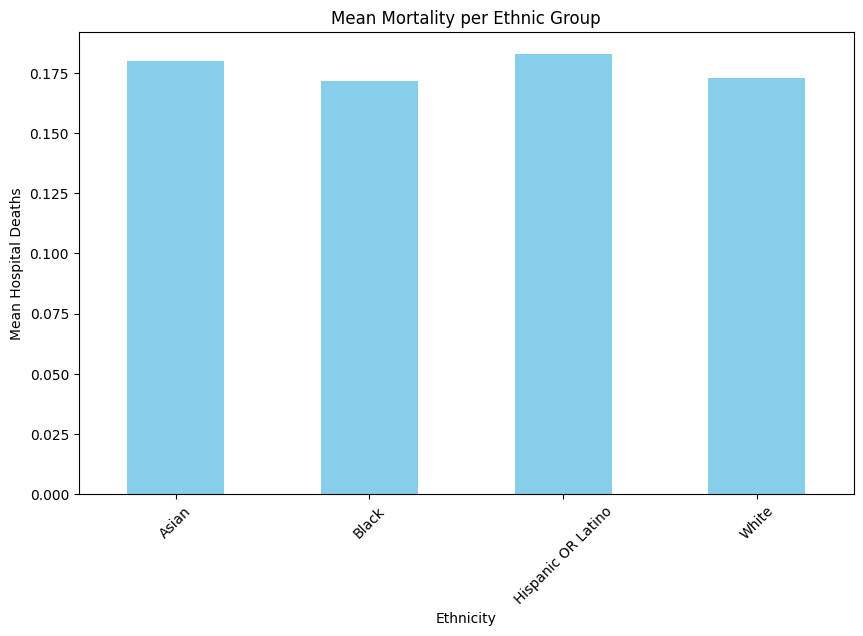

In [ ]:
# let's plot the results!

# Ensure matplotlib uses an inline backend
%matplotlib inline

# Create the bar plot with a specified figure size
plt.figure (figsize =(10,6))

# Plot the mean mortality per ethnic group as a bar plot
mortality_per_ethnicty.plot(kind = 'bar', color = 'skyblue')

# Add labels and titles to the plot for a better understanding
plt.xlabel('Ethnicity') # Label for the x-axis
plt.ylabel('Mean Hospital Deaths') # Lable for the y-axis
plt.title('Mean Mortality per Ethnic Group') # Title of the plot

# Rotate the x-axis labels for better readability
plt.xticks(rotation = 45)

# Display the plot
plt.show()

## Initial Analysis of SpO2 and SaO2
* Present the statistical summary and visualize the distribution of SpO2 and SaO2 values.
* Highlight any differences in SpO2 and SaO2 distributions across different demographic groups (e.g., race_ethnicity, sex).

Goal: To explore the distribution of SpO2 and SaO2 values across different demographics. This step helps to identify any preliminary differences or patterns in SpO2 and SaO2 measurements among various groups.

In [ ]:
# Statistical summary of SpO2 values
Sp02_summary = data_train_imputed_final['SpO2'].describe()
print("SpO2 summary:\n")
print(Sp02_summary.to_string())
print ("\n")

SaO2_summary = data_train_imputed_final['SaO2'].describe()
print("SaO2 summary:\n")
print(SaO2_summary.to_string())

SpO2 summary:

count    36111.000000
mean        97.113151
std          3.855122
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000


SaO2 summary:

count    36111.000000
mean        95.902639
std          4.175827
min         70.000000
25%         94.400000
50%         97.000000
75%         99.000000
max        100.000000


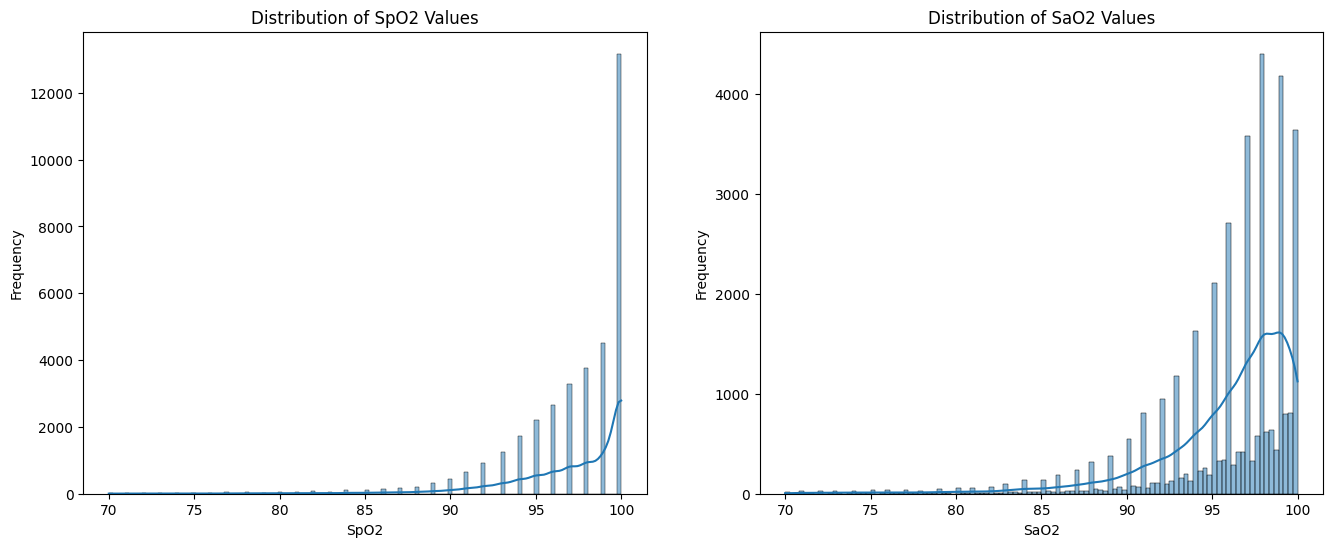

In [ ]:
# Visualization of the Distribution of SpO2 values
plt.figure(figsize=(16,6))


plt.subplot(1,2,1) # a 1-row, 2-column figure: go to the first subplot
sns.histplot(data_train_imputed_final['SpO2'], kde = True)
plt.title ('Distribution of SpO2 Values')
plt.xlabel('SpO2')
plt.ylabel('Frequency')


# Visualization of the Distribution of SaO2 values
plt.subplot(1,2,2)
sns.histplot(data_train_imputed_final['SaO2'], kde = True)
plt.title ('Distribution of SaO2 Values')
plt.xlabel('SaO2')
plt.ylabel('Frequency')

# Adjust the space between the 2 subplots
plt.subplots_adjust (wspace = 0.2)

plt.show()

- Question: - Question: What key insights can you derive from theses plots?

- Your answer: .....

### Comparison of Arterial Oxygen Saturation by Pulse Oximetry Readings

Race Black:
  Slope: 0.85
  Intercept at x=89: 88.32

Race White:
  Slope: 0.79
  Intercept at x=89: 89.40



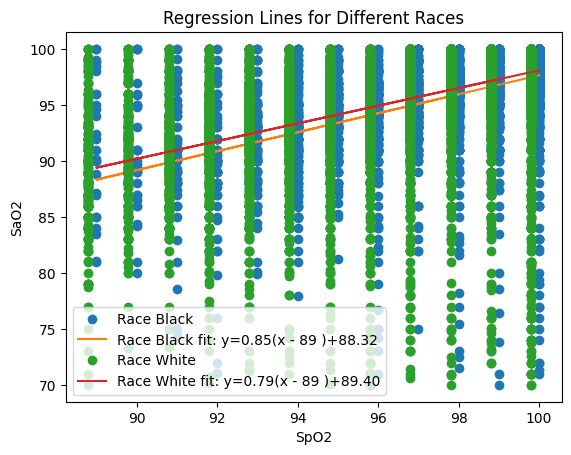

In [ ]:
# Create a copy of the relevant columns from the original DataFrame, filtering only 'White' and 'Black' races
df = data_train_imputed_final.copy()[['SpO2','SaO2','race_ethnicity']][data_train_imputed_final['race_ethnicity'].isin(['White','Black'])]

# Import the linregress function from scipy.stats for performing linear regression, and t for statistical tests
from scipy.stats import linregress, t

# Create a new DataFrame that only includes rows where SpO2 is greater than or equal to 89
df89 = df.copy()[df.SpO2 >= 89]

# Group the DataFrame by 'race_ethnicity'
races = df89.groupby('race_ethnicity')

# Create a matplotlib figure and axes for plotting
fig, ax = plt.subplots()

# Define the x-value where we want to calculate the intercept
x_start = 89

# Define offsets for plotting each race separately to avoid overlapping points
offsets = {'White': -0.2, 'Black': 0.}

# Loop through each group (race) and perform linear regression
for name, race in races:
    # Perform linear regression between SpO2 and SaO2 for the current race group
    slope, intercept, r_value, p_value, std_err = linregress(race['SpO2'], race['SaO2'])

    # Calculate the intercept at x = 89 using the regression line equation
    intercept_at_x_start = slope * x_start + intercept

    # Plot the regression line with an offset for each race group to avoid overlapping points
    offset_x = race['SpO2'] + offsets[name]
    ax.plot(offset_x, race['SaO2'], 'o', label=f'Race {name}')
    ax.plot(race['SpO2'], slope * race['SpO2'] + intercept, label=f'Race {name} fit: y={slope:.2f}(x - {x_start} )+{intercept_at_x_start:.2f}')

    # Print the slope and intercept for each race group
    print(f'Race {name}:')
    print(f'  Slope: {slope:.2f}')
    print(f'  Intercept at x={x_start}: {intercept_at_x_start:.2f}')
    print()


# Add a legend to the plot to distinguish between the different races
ax.legend()

# Label the x-axis as 'SpO2'
plt.xlabel('SpO2')

# Label the y-axis as 'SaO2'
plt.ylabel('SaO2')

# Set the title of the plot
plt.title('Regression Lines for Different Races')

# Display the plot
plt.show()


- Question: What key insights can you derive from this plot?
- Your answer:


## Analysis of Hypoxemia using SpO2 and SaO2 individually

* Define hypoxemia using a threshold for SpO2 and SaO2.
* Compare the incidence of hypoxemia across different demographic groups.
* Highlight any disparities that may indicate bias in SpO2 measurements.

Goal: To compare SpO2 and SaO2 values side by side and examine the incidence of hypoxemia using both measurements. This step highlights the discrepancies and biases in SpO2 measurements by analyzing hypoxemia based on SaO2 measurements and compare it with SpO2-based analysis. This step emphasizes the importance of SaO2 measurements in revealing hidden hypoxemia that SpO2 alone might miss.

In [ ]:
# Please add your code here ...


SpO2:

       race_ethnicity  hypoxemia_incidence
0               Asian             2.142857
1               Black             3.082902
2  Hispanic OR Latino             2.190645
3               White             2.819637


SaO2:

       race_ethnicity  hypoxemia_incidence
0               Asian             4.428571
1               Black             5.673575
2  Hispanic OR Latino             4.440497
3               White             4.557632


### Hypoxemia Incidence

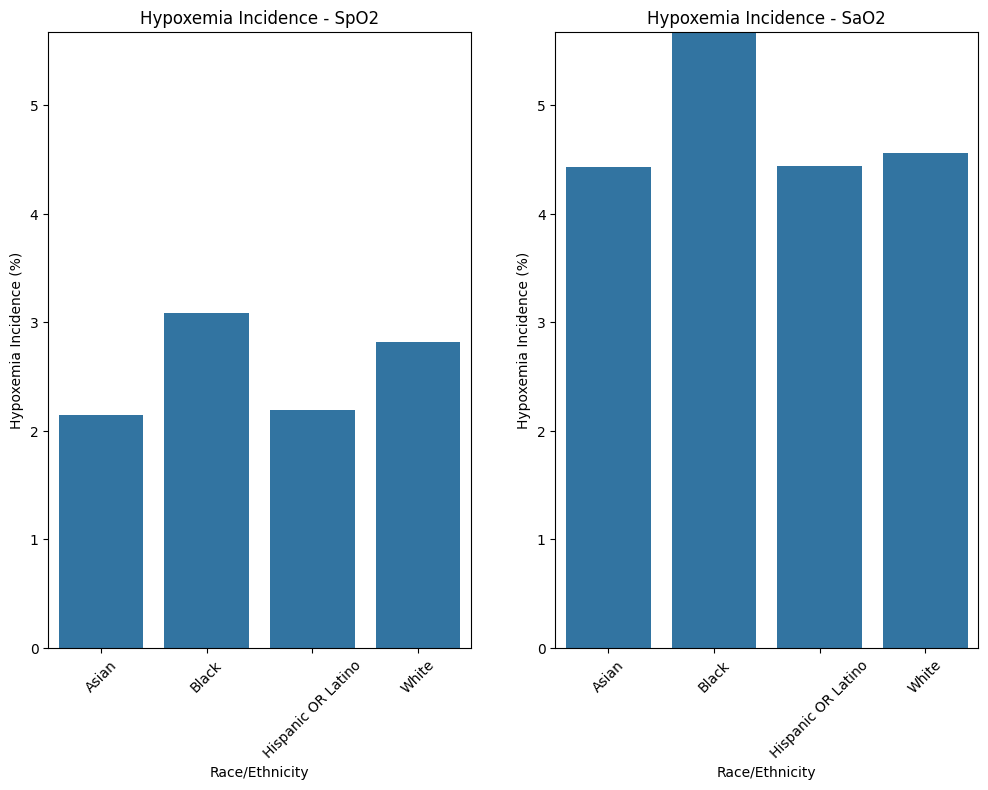

In [ ]:
# Visualization
plt.figure(figsize=(12,8))


# Define the common y-axis limit
y_max = max(hypoxemia_by_race_SpO2['hypoxemia_incidence'].max(), hypoxemia_by_race_SaO2['hypoxemia_incidence'].max())

# a 1-row, 2-column figure: go to the first subplot
plt.subplot(1,2,1)
sns.barplot(x='race_ethnicity', y='hypoxemia_incidence', data = hypoxemia_by_race_SpO2)
plt.title ('Hypoxemia Incidence - SpO2')
plt.xlabel('Race/Ethnicity')
plt.ylabel ('Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)
plt.ylim(0,y_max)


# a 1-row, 2-column figure: go to the second subplot
plt.subplot(1,2,2)
sns.barplot(x='race_ethnicity', y='hypoxemia_incidence', data = hypoxemia_by_race_SaO2)
plt.title ('Hypoxemia Incidence - SaO2')
plt.xlabel('Race/Ethnicity')
plt.ylabel ('Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)
plt.ylim(0,y_max)

# Adjust the space between the 2 subplots
plt.subplots_adjust (wspace = 0.2)

plt.show()

- Question: What key insights can you derive from theses plots?
- Your answer: ....

## Hidden Hypoxemia
This brings us to the concept of hidden hypoxemia. Hidden hypoxemia occurs when patients exhibit low blood oxygen levels that are not detected by pulse oximetry. The accuracy issues and dataset imbalances can exacerbate this problem, particularly in non-white populations. In the next section, we will explore the prevalence of hidden hypoxemia across different racial and ethnic groups, highlighting the critical need for accurate and equitable diagnostic tools in clinical settings.


* Identify hidden hypoxemia using both SpO2 and SaO2 measurements.
* Compare the incidence of hidden hypoxemia across different demographic groups.
* Highlight how the bias in SpO2 measurements can lead to hidden hypoxemia, particularly in certain demographic groups.

Goal: To identify hidden hypoxemia (patients with normal SpO2 but low SaO2) and analyze its prevalence across different demographics. This step uncovers the hidden bias in SpO2 measurements and shows how certain groups are disproportionately affected.


### Hidden Hypoxemia - SpO2 & SaO2

In [ ]:
# Please add your code here ...


       race_ethnicity  hidden_hypoxemia_incidence
0               Asian                    3.000000
1               Black                    4.352332
2  Hispanic OR Latino                    3.611604
3               White                    3.435805


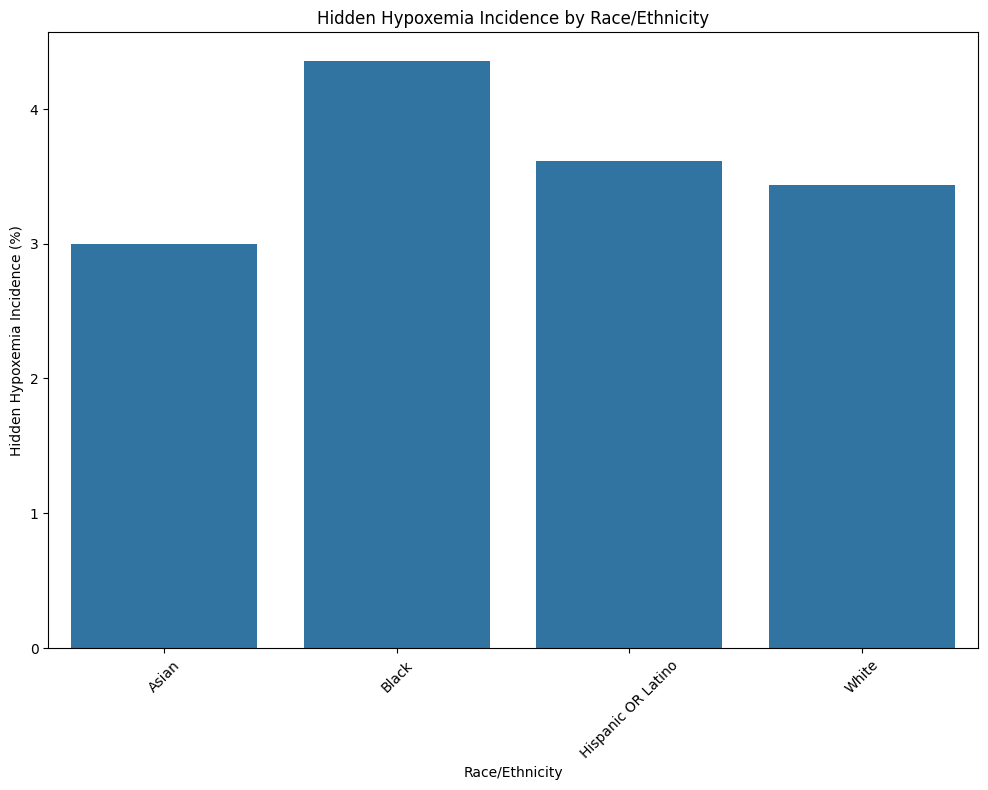

In [ ]:
 # Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='race_ethnicity', y='hidden_hypoxemia_incidence', data=hidden_hypoxemia_by_race)
plt.title('Hidden Hypoxemia Incidence by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Hidden Hypoxemia Incidence (%)')
plt.xticks(rotation = 45)

plt.show()

- Question: What key insights can you derive from this plot?
- Your answer: ....

### Conclusion:

* Objective: To identify hidden hypoxemia by considering both SpO2 and SaO2 measurements and to compare its incidence across different racial/ethnic groups.
* Findings: The analysis of hidden hypoxemia shows even more pronounced disparities, with Black patients having the highest incidence.
* Implication: The high incidence of hidden hypoxemia in Black patients indicates that relying solely on SpO2 can miss cases of low blood oxygen levels, particularly in this group. This highlights the importance of considering SaO2 measurements to ensure accurate diagnosis and treatment.

The analysis highlights the importance of considering both SpO2 and SaO2 measurements in clinical settings, especially for patients from racial/ethnic groups that may be more susceptible to inaccuracies in SpO2 readings.

# Modeling

## SpO2 modifications - exaggerating the bias
This first step is important in the tutorial as it simulates the impact of a known bias in medical devices, specifically pulse oximeters, which often overestimate blood oxygen levels in Black patients. By artificially increasing SpO2 values for Black patients by 10%, we create a dataset that exaggerates this bias. This allows us to analyze how such inaccuracies affect downstream clinical predictions, such as mortality, and highlights the need for fair and accurate data in healthcare machine learning models.


In [ ]:
# Display the baseline distribution of SpO2
print("Baseline SpO2 Distribution:")
print(data_train_imputed_final['SpO2'].describe())

Baseline SpO2 Distribution:
count    36111.000000
mean        97.113151
std          3.855122
min         70.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: SpO2, dtype: float64


In [ ]:
# Please add your code here ...


In [ ]:
# Compare both distributions for Black patients before and after modification
print("Before modification:")
print(data_train_imputed_final.loc[data_train_imputed_final['race_ethnicity'] == 'Black', 'SpO2'].describe())

print ("\n")
print("After modification:")
print(data_train_imputed_final.loc[data_train_imputed_final['race_ethnicity'] == 'Black', 'SpO2_exaggerated'].describe())


Before modification:
count    3860.000000
mean       97.663731
std         3.904454
min        70.000000
25%        97.000000
50%        99.000000
75%       100.000000
max       100.000000
Name: SpO2, dtype: float64


After modification:
count    3860.000000
mean       99.730311
std         1.678041
min        80.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: SpO2_exaggerated, dtype: float64


There is a 1% difference in the median which shows the impact of the introduced bias.
N.B: The median is derived from the .describe() function, which provides various statistical summaries of the data, including the median (50% value).

In [ ]:
data_train_imputed_final.columns

Index(['source_db', 'comorbidity_score_value', 'unique_subject_id',
       'unique_hospital_admission_id', 'unique_icustay_id', 'admission_age',
       'sex_female', 'race_ethnicity', 'BMI_admission', 'weight_admission',
       'height_admission', 'sofa_past_overall_24hr',
       'sofa_future_overall_24hr', 'vitals_heart_rate', 'vitals_mbp_ni',
       'vitals_resp_rate', 'vitals_tempc', 'cbc_wbc', 'cbc_hematocrit',
       'cbc_platelet', 'coag_inr', 'bmp_sodium', 'bmp_potassium',
       'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine',
       'bmp_glucose', 'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt',
       'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total', 'hfp_albumin',
       'others_ck_cpk', 'in_hospital_mortality', 'pH', 'SpO2', 'SaO2',
       'hidden_hypoxemia', 'SpO2_exaggerated'],
      dtype='object')

In [ ]:
# Check for remaining missing values in the imputed training set
missing_data_train = data_train_imputed_final.isnull().sum()
missing_columns_train = missing_data_train[missing_data_train > 0]

if missing_columns_train.empty:
    print("There are no missing values in the training set.")
else:
    print("Columns with remaining missing values in the training set:\n", missing_columns_train)

There are no missing values in the training set.


## Encoding

Since the machine learning model in the background models and finds patterns in our data. It only supports numeric values. For this reason, categorical variables must be coded to numeric values.

Categorical variables can be of 3 types:
* Binary variables: Binary variables can be represented with two values, 1 and 0. Examples are whether or not the variable belongs to a group.
* Ordinal variables: Ordinal variables are a type of variables that have a specific order and can be represented with numeric variables through a label encoder. An example is High, Medium, and Low which can be represented as 3, 2, 1.
* Nominal variables: Nominal variables are categorical variables that do not have a defined order, for these variables it is not recommended to use a label encoder, it is better to use one hot encoder in these cases.

In [ ]:
unique_values = data_train_imputed_final.apply(lambda x: x.unique())

In [ ]:
unique_values

source_db                                             [eicu, mimic_iv, mimic_iii]
comorbidity_score_value         [1.0, 3.0, 4.0, 0.0, 5.0, 2.0, 8.0, 6.0, 26.0,...
unique_subject_id               [11633, 2049, 12464, 22496, 18805, 42892, 2164...
unique_hospital_admission_id    [12807, 2209, 13681, 24674, 20590, 47032, 2374...
unique_icustay_id               [12807, 2209, 13681, 24674, 20590, 47032, 2374...
admission_age                   [51.0, 52.0, 79.0, 67.0, 41.0, 77.0, 65.0, 80....
sex_female                                                                 [1, 0]
race_ethnicity                          [Asian, White, Black, Hispanic OR Latino]
BMI_admission                   [29.77777777777778, 41.96523053665911, 29.2184...
weight_admission                [67.0, 104.1, 100.0, 102.5, 63.5, 66.0, 64.0, ...
height_admission                [150.0, 157.5, 185.0, 170.0, 154.9, 162.6, 157...
sofa_past_overall_24hr          [10.0, 3.0, 4.0, 6.0, 5.0, 12.0, 9.0, 0.0, 1.0...
sofa_future_over

## Standardization
- Why Standardization?
Standardization is generally preferred when dealing with datasets that contain outliers, features with different scales, or when the model assumptions align better with standardized data. It helps to reduce the influence of outliers, stabilize model coefficients, and improve the performance and interpretability of many machine learning algorithms. Normalization, on the other hand, is useful when the absolute scale of the features is important or when using algorithms that are sensitive to the range of the data.

- Remember:
    * When features are not on similar scales, some algorithms may be more heavily influenced by certain features than others, which can lead to suboptimal performance. Additionally, some algorithms (such as those based on distance calculations) can be sensitive to differences in scale between features, which can lead to incorrect results.
    * By standardizing the data, we can ensure that each feature contributes equally to the model, regardless of its scale. This can lead to better accuracy and more robust models.



Note: Use the function to normalize the data. Remember to exclude information that does not contribute to the final model, such as identifiers.

In [ ]:
data_train_imputed_final = data_train_imputed_final.drop(['age_group', 'sex'], axis=1)

KeyError: "['age_group', 'sex'] not found in axis"

In [ ]:
# Define a function standardized_data

def standardized_data(train_data, test_data=None, scaler=None, ignore_cols=[]):

  # Please add your code here ...


Note: Why Return the Scaler? Returning the scaler allows you to use the same scaler for any future data transformations, ensuring consistency. This is especially important if you need to apply the same scaling to new data or to reverse the scaling transformation.

How to know what columns to include? You should exclude identifiers and categorical variables that are not intended to be scaled

In [ ]:
# Define the columns to ignore during normalization (identifiers and categorical variables)
ignore_cols = [
    'unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id',
    'source_db', 'sex_female', 'race_ethnicity', 'in_hospital_mortality', 'hidden_hypoxemia'
]

In [ ]:
from sklearn.preprocessing import StandardScaler


final_standardized_train, final_standardized_test, scaler = standardized_data(
    data_train_imputed_final, data_test_imputed_final, ignore_cols=ignore_cols
)

# Selecting ignored columns
ignored_columns_train = data_train_imputed_final[ignore_cols]
ignored_columns_test = data_test_imputed_final[ignore_cols]

# Reset indices to ensure alignment before concatenation
ignored_columns_train = ignored_columns_train.reset_index(drop=True)
final_standardized_train = final_standardized_train.reset_index(drop=True)

ignored_columns_test = ignored_columns_test.reset_index(drop=True)
final_standardized_test = final_standardized_test.reset_index(drop=True)

# Merge the ignored columns with the standardized columns
final_standardized_train = pd.concat([ignored_columns_train, final_standardized_train], axis=1)
final_standardized_test = pd.concat([ignored_columns_test, final_standardized_test], axis=1)

# Display the shapes of the DataFrames for verification
print("Final standardized train shape:", final_standardized_train.shape)
print("Final standardized test shape:", final_standardized_test.shape)

Final standardized train shape: (36111, 43)
Final standardized test shape: (9028, 43)


## Defining our X_train, y_train, X_test, y_test


In [ ]:
data_train_imputed_final.groupby("race_ethnicity")['in_hospital_mortality'].describe() # to see how many races in our X train

,count,mean,std,min,25%,50%,75%,max
race_ethnicity,,,,,,,,
Asian,700.0,0.180000,0.384462,0.0,0.0,0.0,0.0,1.0
Black,3860.0,0.171503,0.376996,0.0,0.0,0.0,0.0,1.0
Hispanic OR Latino,1689.0,0.182948,0.386739,0.0,0.0,0.0,0.0,1.0
White,29862.0,0.172828,0.378105,0.0,0.0,0.0,0.0,1.0


In [ ]:
# List of columns to exclude from the feature matrix
exclude_cols = [
    'sofa_future_overall_24hr', 'sofa_past_overall_24hr',
    'unique_subject_id', 'unique_hospital_admission_id',
    'unique_icustay_id', 'source_db', 'race_ethnicity', 'in_hospital_mortality'
]

# Define the feature matrix X and target variable y for training and test sets
X_train = final_standardized_train.drop(exclude_cols, axis=1)
y_train = final_standardized_train['in_hospital_mortality']

X_test = final_standardized_test.drop(exclude_cols, axis=1)
y_test = final_standardized_test['in_hospital_mortality']

# Check lengths and indices
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"X_train indices: {X_train.index}")
print(f"y_train indices: {y_train.index}")

Length of X_train: 36111
Length of y_train: 36111
X_train indices: RangeIndex(start=0, stop=36111, step=1)
y_train indices: RangeIndex(start=0, stop=36111, step=1)


## Step 1: Understanding the influence of hidden hypoxemia on patient outcomes
* Following the paper's approach, we are going to perform univariate and multivariate logistic regression to assess binary endpoints (e.g., in-hospital mortality) while adjusting for other covariates (e.g., age, sex, SOFA score), and to use analysis of variance to test for the impact of hidden hypoxemia.

* Goal: Assess the impact of hidden hypoxemia by analyzing its effect on patient outcomes like in-hospital mortality.

### Univariate Logistic Regression

In [ ]:
import statsmodels.api as sm  # Add statsmodels for logistic regression
import numpy as np
import pandas as pd

# List of variables to analyze
vars = ['admission_age',
        'sex_female',
        'BMI_admission',
        'vitals_heart_rate', 'vitals_mbp_ni',
        'vitals_resp_rate', 'vitals_tempc',
        'cbc_wbc', 'cbc_hematocrit',
        'cbc_platelet', 'coag_inr', 'bmp_sodium',
        'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun',
        'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium',
        'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total',
        'hfp_albumin', 'others_ck_cpk',
        'SpO2', 'SaO2', 'pH',
        'SpO2_exaggerated', 'hidden_hypoxemia']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

X_train['hidden_hypoxemia'] = X_train['hidden_hypoxemia'].astype(int)

# Iterate over each variable in the list
for var in vars:
    X = X_train[var]  # Select the current variable from the training data
    y = y_train       # Target variable remains the same

    # statsmodels must explicitly add a constant term
    # Add a constant term to the independent variable for the logistic regression model
    X = sm.add_constant(X)

    # Application of logistic regression model using statsmodels
    model = sm.Logit(y, X)
    result = model.fit(disp=False)  # Fit the model without printing the summary

    # Calculation of p-values and odds ratios
    # Extract the summary of the fitted model
    summary = result.summary2()

    # Extract p-values from the summary
    p_values = summary.tables[1]['P>|z|']

    # Calculate the odds ratios by exponentiating the coefficients
    odds_ratios = np.exp(summary.tables[1]['Coef.'])

    # Calculate the 95% confidence intervals for the odds ratios
    conf_int = np.exp(summary.tables[1][['[0.025', '0.975]']])

    # Create a temporary DataFrame to store the results for the current variable
    results_df_ = pd.DataFrame({
        'Variable': summary.tables[1].index,  # Variable names
        'P-value': p_values,                  # P-values
        'Odds Ratio': odds_ratios,            # Odds ratios
        '95% CI (Lower)': conf_int['[0.025'], # Lower bound of the 95% confidence interval
        '95% CI (Upper)': conf_int['0.975]']  # Upper bound of the 95% confidence interval
    })

    # Filter the results to include only the current variable and concatenate to the final results DataFrame
    results_df = pd.concat([results_df, results_df_[results_df_['Variable'] == var]], axis=0)

# Display the final results DataFrame
display(results_df)

,Variable,P-value,Odds Ratio,95% CI (Lower),95% CI (Upper)
admission_age,admission_age,7.414620e-107,1.398997e+00,1.357690e+00,1.441561e+00
sex_female,sex_female,2.916485e-01,1.029952e+00,9.749775e-01,1.088027e+00
BMI_admission,BMI_admission,7.580564e-01,9.952314e-01,9.654175e-01,1.025966e+00
vitals_heart_rate,vitals_heart_rate,1.716861e-89,1.309789e+00,1.275702e+00,1.344788e+00
vitals_mbp_ni,vitals_mbp_ni,1.865289e-31,8.418927e-01,8.179018e-01,8.665873e-01
vitals_resp_rate,vitals_resp_rate,4.731161e-160,1.416930e+00,1.381479e+00,1.453291e+00
vitals_tempc,vitals_tempc,5.384142e-64,7.999910e-01,7.795401e-01,8.209785e-01
cbc_wbc,cbc_wbc,1.706024e-47,1.202974e+00,1.173250e+00,1.233452e+00
cbc_hematocrit,cbc_hematocrit,8.662029e-13,9.039575e-01,8.792810e-01,9.293265e-01
cbc_platelet,cbc_platelet,1.878204e-08,9.209094e-01,8.948371e-01,9.477414e-01


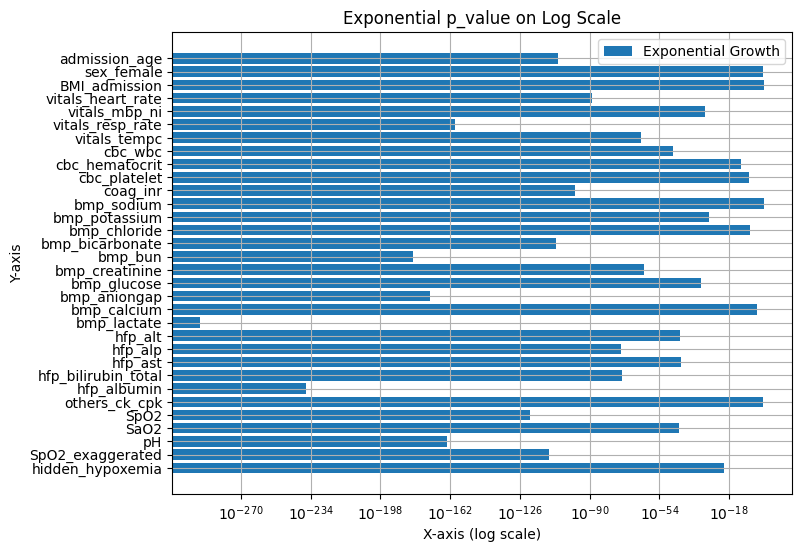

In [ ]:
# Create a figure and set the size
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot of the p-values for each variable
plt.barh(results_df['Variable'], results_df["P-value"], label='Exponential Growth')  # Draw a horizontal bar graph

# Set the x-axis to a logarithmic scale
plt.xscale('log')  # Set the x-axis to a logarithmic scale
plt.gca().invert_yaxis()  # Invert the order of the y-axis (change from top to bottom)

# Decorate the graph
plt.title('Exponential p_value on Log Scale')  # Set the title of the graph
plt.xlabel('X-axis (log scale)')  # Change the label of the x-axis
plt.ylabel('Y-axis')  # Set the label of the y-axis
plt.grid(True)  # Enable grid
plt.legend()  # Display the legend

# Display the graph
plt.show()  # Show the plot


- Question: What key insights can you derive from this figure?
- Your answer: ....


### Multivariate Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Define the features to include
features_to_include = ['admission_age',
        'sex_female',
        'BMI_admission',
        'vitals_heart_rate', 'vitals_mbp_ni',
        'vitals_resp_rate', 'vitals_tempc',
        'cbc_wbc', 'cbc_hematocrit',
        'cbc_platelet', 'coag_inr', 'bmp_sodium',
        'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun',
        'bmp_creatinine', 'bmp_glucose', 'bmp_aniongap', 'bmp_calcium',
        'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total',
        'hfp_albumin', 'others_ck_cpk',
        'pH', 'hidden_hypoxemia']

# Fit the logistic regression model
model = LogisticRegression (max_iter = 1000)
result = model.fit(X_train[features_to_include], y_train)

# Predictions
y_pred = model.predict(X_test[features_to_include])
y_pred_proba = model.predict_proba(X_test[features_to_include]) [:,1]


# Evaluate the model
print("Classification Report:")
print (classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Area under the Curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      7434
         1.0       0.67      0.19      0.29      1594

    accuracy                           0.84      9028
   macro avg       0.76      0.58      0.60      9028
weighted avg       0.82      0.84      0.80      9028

Accuracy: 0.84
AUC: 0.78


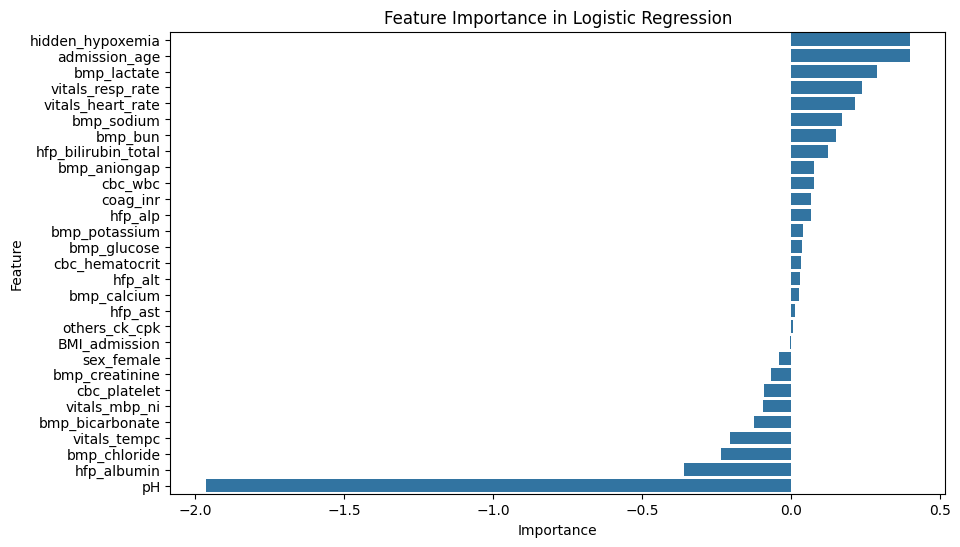

In [ ]:
# Extract coefficients and their importance
coefficients = model.coef_[0]
importance = pd.DataFrame({'Feature': X_train[features_to_include].columns, 'Importance': coefficients})
importance = importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance in Logistic Regression')
plt.show()

- Question: What key insights can you derive from this figure?
- Your answer: ....


#### *Optional*
 * Task: We already assessed the importance of hidden hypoxemia on in-hospital mortality as a binary outcome, now try to:
   - Assess the importance of hidden hypoxemia on ordinal outcomes, such as CVSOFA (Cardiovascular Sequential Organ Failure Assessment) and RSOFA (Respiratory Sequential Organ Failure Assessment) scores.
   - Assess the importance of hidden hypoxemia on continuous outcomes, such as creatinine and lactate levels.
  
 * What observations do you see?

## Step 2: Predicting In Hospital Mortality using different features in the dataset
Goal: Compare the performance of different models that include various combinations of features (SpO2, Sp02_exaggerated, SaO2) in predicting in-hospital mortality across different patient races. This step demonstrates how including or excluding certain features impacts model accuracy, fairness, and overall predictive performance, emphasizing the need for careful feature selection in clinical predictions.




In [ ]:

# Please add your code here ...



In [ ]:
# Define feature sets dynamically excluding 'hidden_hypoxemia'
all_features = X_train.columns.tolist()

# Exclude 'SpO2_exaggerated', 'SpO2', and 'hidden_hypoxemia' for features_sao2
features_sao2 = [feature for feature in all_features if feature not in ['SpO2_exaggerated', 'SpO2', 'hidden_hypoxemia']]

# Exclude 'SaO2', 'SpO2_exaggerated', and 'hidden_hypoxemia' for features_spo2
features_spo2 = [feature for feature in all_features if feature not in ['SaO2', 'SpO2_exaggerated', 'hidden_hypoxemia']]

# Exclude 'SaO2', 'SpO2', and 'hidden_hypoxemia' for features_exaggerated_spo2
features_exaggerated_spo2 = [feature for feature in all_features if feature not in ['SaO2', 'SpO2', 'hidden_hypoxemia']]


In [ ]:
# Train each model
model_sao2, y_pred_sao2, y_pred_proba_sao2 = train_model(X_train, X_test, y_train, features_sao2)
model_spo2, y_pred_spo2, y_pred_proba_spo2 = train_model(X_train, X_test, y_train, features_spo2)
model_exaggerated_spo2, y_pred_exaggerated_spo2, y_pred_proba_exaggerated_spo2 = train_model(X_train, X_test, y_train, features_exaggerated_spo2)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, balanced_accuracy_score

# Evaluate across races
def evaluate_across_races(X_test, y_test, y_pred, y_pred_proba, data_test, model, features):
    """
    Evaluate model performance across different race/ethnicity groups.

    This function evaluates the performance of a trained machine learning model across
    different race/ethnicity groups in the test dataset. It generates classification reports,
    calculates accuracy and AUC scores, and identifies feature importance for each group.

    Parameters:
    X_test (array-like): Test features.
    y_test (array-like): True labels for the test set.
    y_pred (array-like): Predicted labels for the test set.
    y_pred_proba (array-like): Predicted probabilities for the positive class.
    data_test (DataFrame): Test dataset containing the race/ethnicity information.
    model (sklearn model): Trained machine learning model.
    features (list): List of feature names.

    Returns:
    group_reports (dict): Dictionary containing classification reports, accuracy, and AUC scores for each race/ethnicity group.
    feature_importance_dict (dict): Dictionary containing feature importance for each race/ethnicity group.
    """

    # Create a DataFrame for evaluation using the test features
    evaluation_df = pd.DataFrame(X_test, columns=features)

    # Add the actual test labels to the DataFrame
    evaluation_df['y_test'] = y_test.values

    # Add the predicted labels to the DataFrame
    evaluation_df['y_pred'] = y_pred

    # Add the predicted probabilities to the DataFrame
    evaluation_df['y_pred_proba'] = y_pred_proba

    # Add the race/ethnicity information to the DataFrame
    evaluation_df['race_ethnicity'] = data_test['race_ethnicity'].values



    # Initialize dictionaries to store reports and feature importances for each race group
    group_reports = pd.DataFrame()

    # Loop through each unique race/ethnicity group in the evaluation DataFrame
    for i, group in enumerate(evaluation_df['race_ethnicity'].unique()):
        # Filter the data for the current race/ethnicity group
        group_data = evaluation_df[evaluation_df['race_ethnicity'] == group]

        # Extract the actual labels for the current group
        y_test_group = group_data['y_test']

        # Extract the predicted labels for the current group
        y_pred_group = group_data['y_pred']

        # Extract the predicted probabilities for the current group
        y_pred_proba_group = group_data['y_pred_proba']


        # Generate a classification report for the current group
        report = classification_report(y_test_group, y_pred_group, output_dict=True)

        group_reports.loc[i, 'race_ethnicity'] = group

        # Weighted precision for the race group
        group_reports.loc[i, "Weighted Precision"] = report['weighted avg']['precision']

        # Weighted recall for the race group
        group_reports.loc[i, "Weighted Recall"] = report['weighted avg']['recall']

        # Weighted F1-score for the race group
        group_reports.loc[i, "Weighted F1-Score"] = report['weighted avg']['f1-score']

        # Calculate the balanced accuracy for the current group
        group_reports.loc[i, 'balanced_accuracy'] = balanced_accuracy_score(y_test_group, y_pred_group)

        # Calculate the AUC score for the current group
        group_reports.loc[i, 'auc'] = roc_auc_score(y_test_group, y_pred_proba_group)

    return group_reports




In [ ]:
# Evaluate across races for each model
group_reports_sao2 = evaluate_across_races(X_test, y_test, y_pred_sao2, y_pred_proba_sao2, final_standardized_test, model_sao2, features_sao2)

group_reports_spo2 = evaluate_across_races(X_test, y_test, y_pred_spo2, y_pred_proba_spo2, final_standardized_test, model_spo2, features_spo2)

group_reports_exaggerated_spo2 = evaluate_across_races(X_test, y_test, y_pred_exaggerated_spo2, y_pred_proba_exaggerated_spo2, final_standardized_test, model_exaggerated_spo2, features_exaggerated_spo2)


In [ ]:
group_reports_sao2['features'] = 'SaO2'
group_reports_spo2['features'] = 'SpO2'
group_reports_exaggerated_spo2['features'] = 'Exaggerated SpO2'

all_reports = pd.concat([group_reports_sao2,group_reports_spo2,group_reports_exaggerated_spo2],axis=0)

all_reports.sort_values(['race_ethnicity','features'])[['features','race_ethnicity', 'auc', 'Weighted Precision', 'Weighted Recall',
       'Weighted F1-Score', 'balanced_accuracy']]

,features,race_ethnicity,auc,Weighted Precision,Weighted Recall,Weighted F1-Score,balanced_accuracy
3,Exaggerated SpO2,Asian,0.727519,0.852817,0.860759,0.819215,0.576241
3,SaO2,Asian,0.726617,0.840190,0.854430,0.807050,0.556241
3,SpO2,Asian,0.728421,0.852817,0.860759,0.819215,0.576241
1,Exaggerated SpO2,Black,0.758489,0.797087,0.832432,0.794723,0.572467
1,SaO2,Black,0.759869,0.797797,0.832432,0.796895,0.577410
1,SpO2,Black,0.760139,0.805853,0.836757,0.801089,0.582496
2,Exaggerated SpO2,Hispanic OR Latino,0.782582,0.801163,0.822014,0.783712,0.597269
2,SaO2,Hispanic OR Latino,0.775523,0.792869,0.817330,0.775786,0.585641
2,SpO2,Hispanic OR Latino,0.782923,0.801163,0.822014,0.783712,0.597269
0,Exaggerated SpO2,White,0.789874,0.825862,0.844906,0.808421,0.594704


- Question: What key insights can you derive from this table?
- Your answer: ....

Reminder:
- Recall: This is critical in your context because it measures the ability of the model to identify all actual positive cases (e.g., patients who died). High recall ensures that the model doesn't miss many critical cases, which is essential in a healthcare setting.

- Precision: While not as critical as recall, precision indicates the proportion of positive identifications that are actually correct. It helps in understanding the false positive rate.

- F1-Score: This metric provides a balance between precision and recall. It's useful when you want a single metric that considers both false positives and false negatives.

- Accuracy: While it gives an overall performance measure, it can be misleading in imbalanced datasets (e.g., more patients survive than die).

- AUC (Area Under the Curve): This metric helps understand the model's ability to distinguish between positive and negative cases across various threshold settings. It’s useful for evaluating overall model performance.



### Calibration Plot

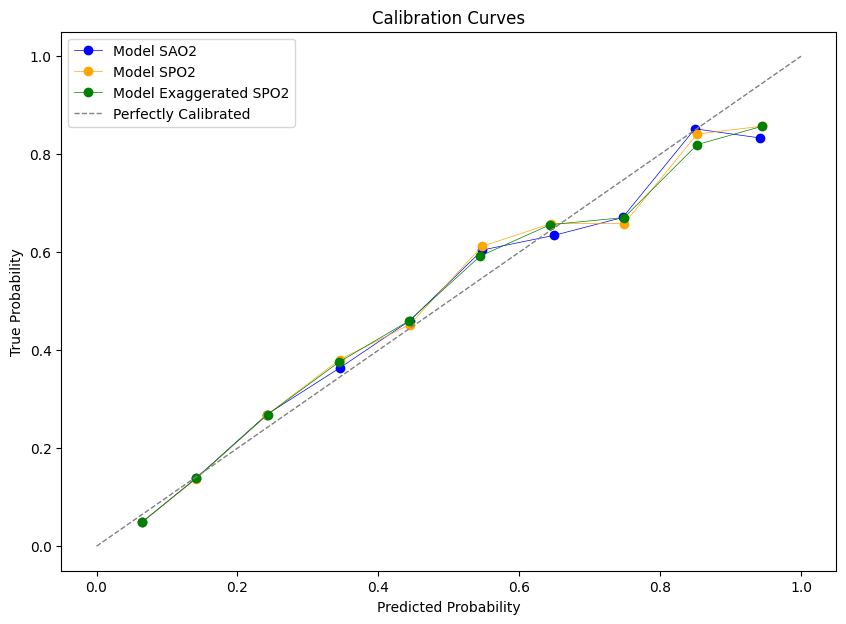

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

# Calibration curve for model_sao2
prob_true_sao2, prob_pred_sao2 = calibration_curve(y_test, y_pred_proba_sao2, n_bins=10)

# Calibration curve for model_spo2
prob_true_spo2, prob_pred_spo2 = calibration_curve(y_test, y_pred_proba_spo2, n_bins=10)

# Calibration curve for model_exaggerated_spo2
prob_true_exaggerated_spo2, prob_pred_exaggerated_spo2 = calibration_curve(y_test, y_pred_proba_exaggerated_spo2, n_bins=10)

# Plot calibration curves
plt.figure(figsize=(10, 7))

# Plot calibration curve for model_sao2
plt.plot(prob_pred_sao2, prob_true_sao2, marker='o', label='Model SAO2', color='blue', linewidth=0.5)

# Plot calibration curve for model_spo2
plt.plot(prob_pred_spo2, prob_true_spo2, marker='o', label='Model SPO2', color='orange', linewidth=0.5)

# Plot calibration curve for model_exaggerated_spo2
plt.plot(prob_pred_exaggerated_spo2, prob_true_exaggerated_spo2, marker='o', label='Model Exaggerated SPO2', color='green', linewidth=0.5)

# Plot perfectly calibrated line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated', linewidth=1)


plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curves')
plt.legend()
plt.show()


- Question: What key insights can you derive from this figure?
- Your answer: ....


#### *Optional*
 * Try the same pipeline to assess different outcomes:
   - Ordinal outcomes, such as CVSOFA (Cardiovascular Sequential Organ Failure Assessment) and RSOFA (Respiratory Sequential Organ Failure Assessment) scores.
   - Continuous outcomes, such as creatinine and lactate levels.
  
 * What observations do you see?